## CODIGO 

Alumno: Estrada Barragan Añlvaro Sandro 
Matricula: 240110052
[Índice](index.ipynb)

               Valor  Frecuencia Absoluta  Frecuencia Relativa  \
0      (1.08, 2.089]                   33                0.066   
1     (2.089, 3.077]                   36                0.072   
2     (3.077, 4.065]                   20                0.040   
3     (4.065, 5.053]                   25                0.050   
4     (5.053, 6.041]                   18                0.036   
5     (6.041, 7.029]                   23                0.046   
6     (7.029, 8.017]                   24                0.048   
7     (8.017, 9.004]                   28                0.056   
8     (9.004, 9.992]                   16                0.032   
9     (9.992, 10.98]                   18                0.036   
10   (10.98, 11.968]                   28                0.056   
11  (11.968, 12.956]                   22                0.044   
12  (12.956, 13.944]                   33                0.066   
13  (13.944, 14.932]                   20                0.040   
14   (14.9

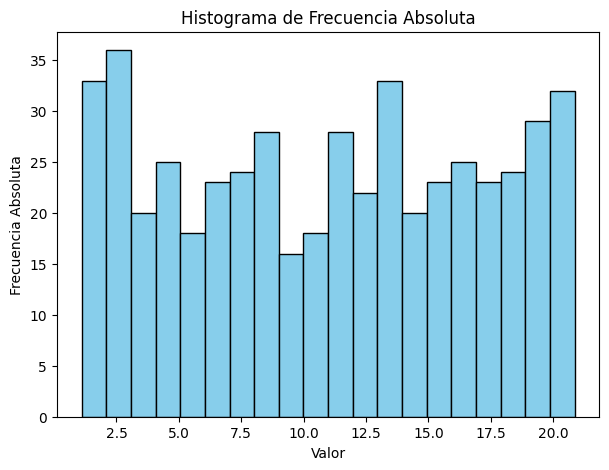

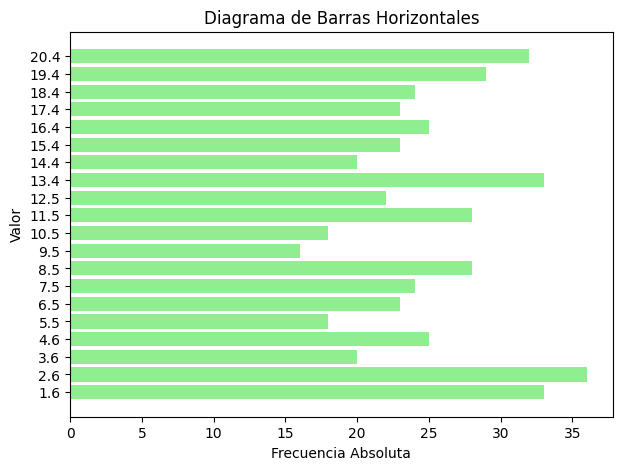

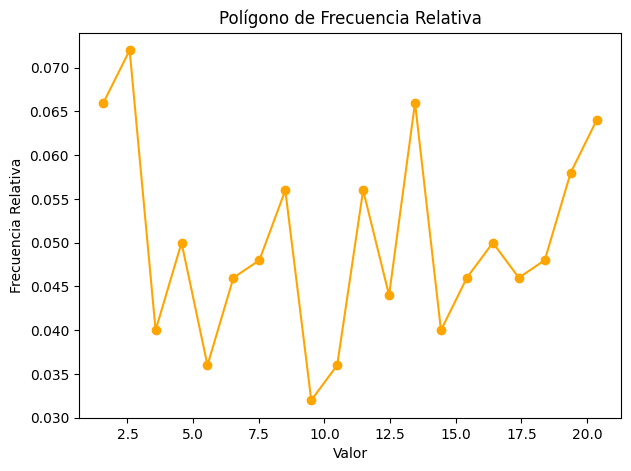

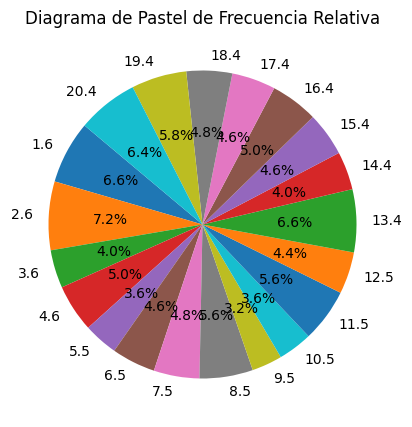

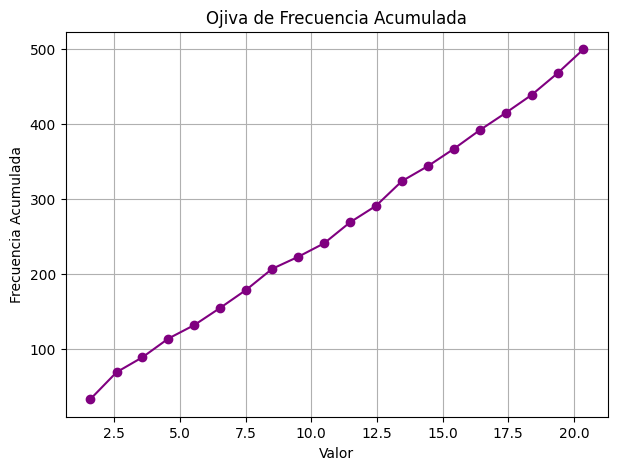

In [8]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generar datos aleatorios
np.random.seed(42)  # Para reproducibilidad
data = np.random.uniform(1.0, 21.0, size=500)  # Datos decimales de 1.0 a 20.0

# Crear tabla de frecuencia
frecuencia = pd.Series(data).value_counts(bins=20).sort_index()  # Ajustar bins para flotantes
tabla_frecuencia = pd.DataFrame({
    'Valor': frecuencia.index,
    'Frecuencia Absoluta': frecuencia.values,
    'Frecuencia Relativa': frecuencia.values / len(data),
    'Frecuencia Acumulada': frecuencia.cumsum()
})

# Calcular totales
totales = {
    'Valor': 'Total',
    'Frecuencia Absoluta': tabla_frecuencia['Frecuencia Absoluta'].sum(),
    'Frecuencia Relativa': (tabla_frecuencia['Frecuencia Relativa'].sum() * 100),  # Convertir a porcentaje
    'Frecuencia Acumulada': tabla_frecuencia['Frecuencia Acumulada'].iloc[-1]
}

# Crear un DataFrame para los totales
totales_df = pd.DataFrame([totales])

# Concatenar la tabla de frecuencia con los totales
tabla_frecuencia = pd.concat([tabla_frecuencia, totales_df], ignore_index=True)

# Mostrar tabla de frecuencia con totales
print(tabla_frecuencia)

# Graficar frecuencia absoluta usando un histograma
plt.figure(figsize=(7, 5))
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Frecuencia Absoluta')
plt.xlabel('Valor')
plt.ylabel('Frecuencia Absoluta')
plt.show()

# Graficar frecuencia absoluta usando un diagrama de barras horizontales
bin_centers = (frecuencia.index.left + frecuencia.index.right) / 2
plt.figure(figsize=(7, 5))
plt.barh([f'{x:.1f}' for x in bin_centers], tabla_frecuencia['Frecuencia Absoluta'][:-1], color='lightgreen')
plt.title('Diagrama de Barras Horizontales')
plt.xlabel('Frecuencia Absoluta')
plt.ylabel('Valor')
plt.show()

# Graficar frecuencia relativa usando un polígono de frecuencia
plt.figure(figsize=(7, 5))
plt.plot(bin_centers, tabla_frecuencia['Frecuencia Relativa'][:-1], marker='o', color='orange')
plt.title('Polígono de Frecuencia Relativa')
plt.xlabel('Valor')
plt.ylabel('Frecuencia Relativa')
plt.show()

# Graficar frecuencia relativa usando un diagrama de pastel
plt.figure(figsize=(7, 5))
plt.pie(tabla_frecuencia['Frecuencia Relativa'][:-1], labels=[f'{x:.1f}' for x in bin_centers], autopct='%1.1f%%', startangle=140)
plt.title('Diagrama de Pastel de Frecuencia Relativa')
plt.show()

# Graficar frecuencia acumulada usando la ojiva
plt.figure(figsize=(7, 5))
plt.plot(bin_centers, tabla_frecuencia['Frecuencia Acumulada'][:-1], marker='o', color='purple')
plt.title('Ojiva de Frecuencia Acumulada')
plt.xlabel('Valor')
plt.ylabel('Frecuencia Acumulada')
plt.grid()
plt.show()